In [126]:
NONSENSICAL_LABELS = False

In [127]:
import pandas as pd

if NONSENSICAL_LABELS:
    df = pd.read_csv("../evaluations/priors-all.tsv", sep="\t", names=["model", "dataset", "prompt", "random_demos", "informative_demos"])  # TODO: remove "difference column"
else:
    df = pd.read_csv("../evaluations/priors-flipped-all.tsv", sep="\t", names=["model", "dataset", "prompt", "random_demos", "informative_demos"])  # TODO: remove "difference column"
df

# "informative" are evaluations with nonsense, or flipped labels
# "random" are normal (=semantically-correct) labels

,model,dataset,prompt,random_demos,informative_demos
0,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.48,0.47
1,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.40,0.45
2,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.49,0.50
3,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.50,0.47
4,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.57,0.42
...,...,...,...,...,...
203995,allenai/mtk-instruct-3b-def-pos,super_glue/axg,should assume,0.48,0.53
203996,allenai/mtk-instruct-3b-def-pos,super_glue/axg,should assume,0.52,0.49
203997,allenai/mtk-instruct-3b-def-pos,super_glue/axg,should assume,0.48,0.53
203998,allenai/mtk-instruct-3b-def-pos,super_glue/axg,should assume,0.47,0.54


In [128]:
df.groupby(["model", "dataset", "prompt"]).mean().tail(10)

random_demos  \
model                                          dataset              prompt                                    
trained_models/mt5_teabreac-aqa_hard_3b_ch2000 super_glue/wsc.fixed GPT-3 Style                     0.33140   
                                                                    I think they mean               0.53085   
                                                                    Who or what is/are              0.06300   
                                                                    by p they mean                  0.52595   
                                                                    does p stand for                0.24395   
                                                                    does the pronoun refer to       0.20155   
                                                                    in other words                  0.52830   
                                                                    p is/are r                      0.52870   
                                                                    replaced with                   0.24725   
                                                                    the pronoun refers to           0.52240   

                                                                                               informative_demos  
model                                          dataset              prompt                                        
trained_models/mt5_teabreac-aqa_hard_3b_ch2000 super_glue/wsc.fixed GPT-3 Style                          0.35045  
                                                                    I think they mean                    0.53205  
                                                                    Who or what is/are                   0.27810  
                                                                    by p they mean                       0.53675  
                                                                    does p stand for                     0.52490  
                                                                    does the pronoun refer to            0.47570  
                                                                    in other words                       0.53245  
                                                                    p is/are r                           0.53125  
                                                                    replaced with                        0.49455  
                                                                    the pronoun refers to                0.53660

In [129]:
# TODO: decide if to use normalization

# df["Performance change"] = df.apply(lambda row: (row["informative_demos"] - row["random_demos"]) / row["random_demos"] 
#                                                  if row["random_demos"] != 0 else 1, axis=1)

In [130]:
df["Performance change"] = df.apply(lambda row: (row["informative_demos"] - row["random_demos"]), axis=1)

In [131]:
# binary normalization: 1 if worsened, 0 otherwise
# df["Performance change"] = df.apply(lambda row: -1 if row["informative_demos"] < row["random_demos"] else 0, axis=1)

In [132]:
df.groupby(["model", "dataset", "prompt"]).mean()["random_demos"]

model                                           dataset               prompt                       
allenai/mtk-instruct-3b-def-pos                 super_glue/axb        GPT-3 style                      0.49910
                                                                      MNLI crowdsource                 0.01255
                                                                      based on the previous passage    0.18505
                                                                      can we infer                     0.25875
                                                                      does it follow that              0.23090
                                                                                                        ...   
trained_models/mt5_teabreac-aqa_hard_3b_ch2000  super_glue/wsc.fixed  does the pronoun refer to        0.20155
                                                                      in other words                   0.52830
            

In [133]:
max_vals = df.groupby(["model", "dataset", "prompt"]).mean()["random_demos"].groupby(["model", "dataset"]).idxmax().tolist()
# max_vals.reset_index("prompt")
# max_vals

In [134]:
max_vals

[('allenai/mtk-instruct-3b-def-pos', 'super_glue/axb', 'GPT-3 style'),
 ('allenai/mtk-instruct-3b-def-pos', 'super_glue/axg', 'does it follow that'),
 ('allenai/mtk-instruct-3b-def-pos', 'super_glue/boolq', 'GPT-3 Style'),
 ('allenai/mtk-instruct-3b-def-pos',
  'super_glue/cb',
  'claim true/false/inconclusive'),
 ('allenai/mtk-instruct-3b-def-pos',
  'super_glue/multirc',
  'I was going to say…'),
 ('allenai/mtk-instruct-3b-def-pos', 'super_glue/rte', 'does this imply'),
 ('allenai/mtk-instruct-3b-def-pos',
  'super_glue/wic',
  'question-context-meaning'),
 ('allenai/mtk-instruct-3b-def-pos',
  'super_glue/wsc.fixed',
  'I think they mean'),
 ('allenai/tk-instruct-3b-def-pos', 'super_glue/axb', 'GPT-3 style'),
 ('allenai/tk-instruct-3b-def-pos', 'super_glue/axg', 'does it follow that'),
 ('allenai/tk-instruct-3b-def-pos', 'super_glue/boolq', 'exam'),
 ('allenai/tk-instruct-3b-def-pos', 'super_glue/cb', 'should assume'),
 ('allenai/tk-instruct-3b-def-pos',
  'super_glue/multirc',
  'p

In [135]:
max_info_df = df[df.apply(lambda row: tuple(row[["model", "dataset", "prompt"]]) in max_vals, axis=1)]
max_info_df

,model,dataset,prompt,random_demos,informative_demos,Performance change
0,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.48,0.47,-0.01
1,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.40,0.45,0.05
2,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.49,0.50,0.01
3,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.50,0.47,-0.03
4,trained_models/mt5_aqa-only_random_large_ch1000,super_glue/axb,GPT-3 style,0.57,0.42,-0.15
...,...,...,...,...,...,...
202995,allenai/mtk-instruct-3b-def-pos,super_glue/axg,does it follow that,0.45,0.50,0.05
202996,allenai/mtk-instruct-3b-def-pos,super_glue/axg,does it follow that,0.60,0.43,-0.17
202997,allenai/mtk-instruct-3b-def-pos,super_glue/axg,does it follow that,0.51,0.41,-0.10
202998,allenai/mtk-instruct-3b-def-pos,super_glue/axg,does it follow that,0.54,0.41,-0.13


## Adjustments for plotting into the paper

In [136]:
plotted_model_names = {
                       "trained_models/mt5_aqa-only_random_large_ch1000": "Tk-QA-1B",
                       "authoranonymous321/mt5_large-teabreac-AQA_random": "Tk-random-1B",
                       "authoranonymous321/mt5_large-teabreac-AQA_hard": "Tk-CoAT-1B",
                       "trained_models/mt5_aqa-only_random_3b_ch3400": "Tk-QA-3B",
                       "trained_models/mt5-3b-tea_random_ch2200": "Tk-random-3B",
                       "trained_models/mt5_teabreac-aqa_hard_3b_ch2000": "Tk-CoAT-3B",
    
                       # "allenai/tk-instruct-large-def-pos": "tk-instruct-1B",
                       # "google/flan-t5-large": "Flan-T5-1B",

                       # "trained_models/AQA+SQAD_random_large_ch6000": "Baseline-Tk-QA-1B",  # TODO: we need random model
                       # "trained_models/mt5_teabreac_random+AQA_random_ch5000": "Tk-QA-random-1B",  # TODO: we need random model
                       # "trained_models/mt5_teabreac+AQA_hard_large_ch3000": "Tk-QA-info-1B",
                       # "allenai/tk-instruct-large-def-pos": "Tk-instruct-1B",
                       # "google/flan-t5-large": "Flan-1B",
                       # "allenai/tk-instruct-3b-def-pos": "Tk-instruct-3B",
                       "allenai/mtk-instruct-3b-def-pos": "Tk-Instruct-3B",
                       "bigscience/T0_3B": "T0-3B",
                       "google/flan-t5-xl": "Flan-3B",
                       # "allenai/tk-instruct-11b-def-pos": "Tk-instruct-11B",
                       # "bigscience/T0pp": "T0-11B",
                       # "google/flan-t5-xxl": "Flan-11B",
                       # "davinci": "GPT3-175B",
                       # "text-davinci-003": "InstructGPT-175B",
}

plotted_df = pd.DataFrame()

for current_id, new_id in plotted_model_names.items():
    orig_df = max_info_df[max_info_df["model"] == current_id] 
    new_df = orig_df.copy()
    new_df["model"] = new_id
    
    plotted_df = pd.concat([plotted_df, new_df])

plotted_df.head()

,model,dataset,prompt,random_demos,informative_demos,Performance change
0,Tk-QA-1B,super_glue/axb,GPT-3 style,0.48,0.47,-0.01
1,Tk-QA-1B,super_glue/axb,GPT-3 style,0.40,0.45,0.05
2,Tk-QA-1B,super_glue/axb,GPT-3 style,0.49,0.50,0.01
3,Tk-QA-1B,super_glue/axb,GPT-3 style,0.50,0.47,-0.03
4,Tk-QA-1B,super_glue/axb,GPT-3 style,0.57,0.42,-0.15


## Actual plotting

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

pal = sns.color_palette("muted")

hex = pal.as_hex()
hex

['#4878d0',
 '#ee854a',
 '#6acc64',
 '#d65f5f',
 '#956cb4',
 '#8c613c',
 '#dc7ec0',
 '#797979',
 '#d5bb67',
 '#82c6e2']

In [105]:
str(hex)

"['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']"

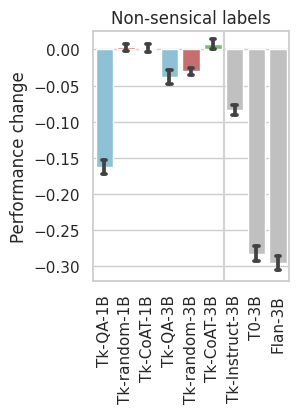

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (3.15, 4.3)})
# sns.set(rc={'figure.figsize': (10, 8)})
sns.set(style="whitegrid")
# sns.dark_palette("#69d", reverse=True)

colors = ['#82c6e2', '#d65f5f', '#6acc64', '#82c6e2', '#d65f5f', '#6acc64'] + ["silver"] * 3
palette = sns.color_palette(colors)
sns.set_palette(palette)

plt.xticks(rotation=90)
plt.title("%s labels" % ("Non-sensical" if NONSENSICAL_LABELS else "Flipped"))

# sns.set(rc={'figure.figsize': (10, 7)})
plt.tight_layout()
# g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "glue/mnli"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)], showfliers=False)

g = sns.barplot(data=plotted_df, x="model", y="Performance change", errorbar="ci", capsize=0.2)
g.set(xlabel=None)
# g.set(ylabel=None)
plt.ylim((-0.32, 0.025))
g.axvline(5.5, color="lightgray")
    
plt.tight_layout()

plt.legend([],[], frameon=False)
plt.savefig("priors_reliance_bars_v2.pdf", format="pdf")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (2.2, 4.3)})
# sns.set(rc={'figure.figsize': (10, 8)})
sns.set(style="whitegrid")

colors = ['#82c6e2', '#d65f5f', '#6acc64', '#82c6e2', '#d65f5f', '#6acc64'] + ["silver"] * 3
palette = sns.color_palette(colors)
sns.set_palette(palette)

plt.xticks(rotation=90)
plt.title("%s labels" % ("Non-sensical" if NONSENSICAL_LABELS else "Flipped"))

# sns.set(rc={'figure.figsize': (10, 7)})
plt.tight_layout()
# g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "glue/mnli"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)], showfliers=False)

g = sns.barplot(data=plotted_df, x="model", y="Performance change", errorbar="ci", capsize=0.2)

g.set(yticklabels=[])
g.set(ylabel=None)

g.set(xlabel=None)
g.set(ylabel=None)
g.axvline(5.5, color="lightgray")

plt.ylim((-0.32, 0.025))

plt.tight_layout()

plt.legend([],[], frameon=False)
plt.savefig("priors-flipped_reliance_bars_v2.pdf", format="pdf")